# Handling Outliers Using IQR:

### Assumptions:

1. The data should be skewed.
2. No null values.

### Boxplot and IQR:

<img src='images/box.png' width='700'>

- Note: IQR = Q3 - Q1

where, Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Datasets/house_purchased.csv')

In [8]:
df.sample(3)

,price,area,purchased
264,4410000,4900,0
72,6720000,5020,0
125,5943000,15600,0


In [9]:
df.isnull().sum()

price        0
area         0
purchased    0
dtype: int64

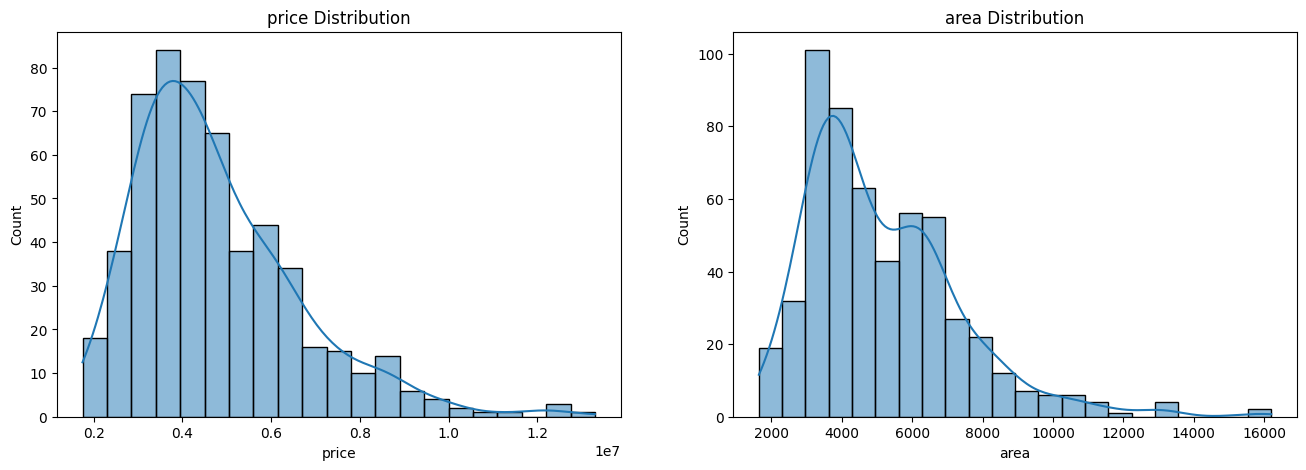

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,5))

sns.histplot(df['price'],kde=True,ax=ax1)
ax1.set_title('price Distribution')

sns.histplot(df['area'],kde=True,ax=ax2)
ax2.set_title('area Distribution')

plt.show()

In [12]:
print(df['price'].skew())
print(df['area'].skew())

1.2122388370279802
1.321188343153483


<Axes: ylabel='price'>

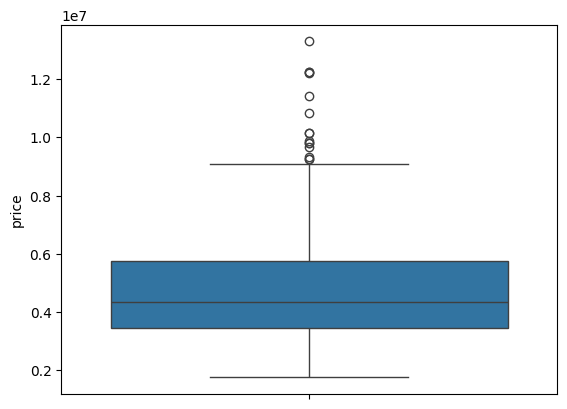

In [19]:
sns.boxplot(df['price'])

## Approaches:

1. IQR Trimming
2. IQR Capping

In [13]:
# Finding the IQR
p25 = df['price'].quantile(0.25)
p75 = df['price'].quantile(0.75)

In [14]:
print(p25,p75)

3430000.0 5740000.0


In [16]:
IQR = p75 - p25
print(IQR)

2310000.0


In [17]:
upper_limit = p75 + 1.5*IQR
lower_limit = p25 - 1.5*IQR

In [18]:
print(upper_limit,lower_limit)

9205000.0 -35000.0


In [20]:
df[df['price'] > upper_limit]

,price,area,purchased
0,13300000,7420,0
1,12250000,8960,1
2,12250000,9960,1
3,12215000,7500,1
4,11410000,7420,0
5,10850000,7500,1
6,10150000,8580,1
7,10150000,16200,1
8,9870000,8100,1
9,9800000,5750,0


In [22]:
df[df['price'] < lower_limit]

,price,area,purchased


In [26]:
df.shape

(545, 3)

## Approach 1st: IQR trimming

1. Calculate the interquartile range (IQR) of the data. (IQR = Q3 - Q1)
2. Then, calculate upper limit and lower limit.
- upper limit = Q3 + 1.5 * IQR
- lower limit = Q1 - 1.5 * IQR
3. Trim the data by removing the values that are below the lower limit or above the upper limit.

In [27]:
new_df = df[df['price'] < upper_limit]
new_df.shape

(530, 3)

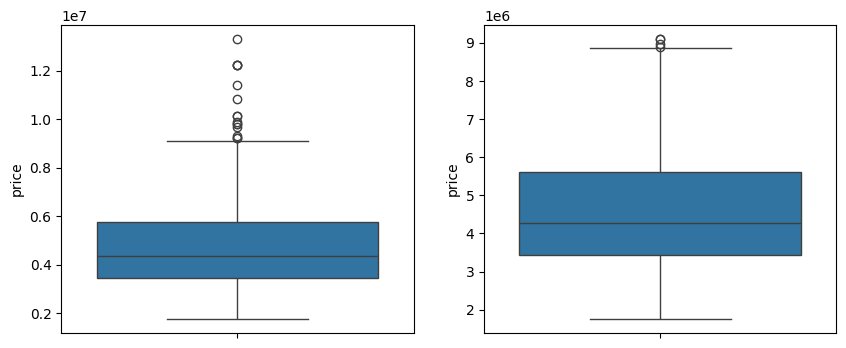

In [29]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.boxplot(df['price'],ax=ax1)
sns.boxplot(new_df['price'],ax=ax2)
plt.show()

## Approach 2nd: IQR capping

1. Calculate the IQR of the data.
2. Then, calculate upper limit and lower limit.
- upper limit = Q3 + 1.5 * IQR
- lower limit = Q1 - 1.5 * IQR
3. Instead of removing outliers, we cap the data at the upper and lower limits. It means that any data point that is above the upper limit replaced with upper limit or below the lower limit will be replaced will lower limit.

In [30]:
print(upper_limit, lower_limit)

9205000.0 -35000.0


In [31]:
def iqr_cap(data):
    if data > upper_limit:
        return upper_limit
    elif data < lower_limit:
        return lower_limit
    else:
        return data
    

In [32]:
df['capped_price'] = df['price'].apply(iqr_cap)

In [33]:
df.sample(3)

,price,area,purchased,capped_price
346,3850000,2176,1,3850000.0
95,6300000,4100,1,6300000.0
228,4690000,3630,0,4690000.0


In [34]:
df.shape

(545, 4)

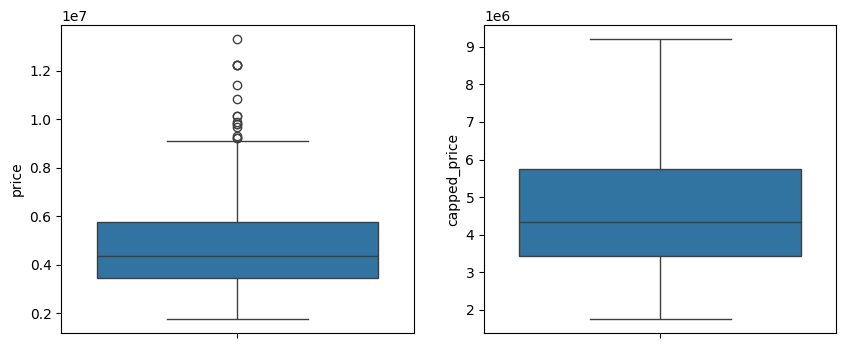

In [35]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.boxplot(df['price'],ax=ax1)
sns.boxplot(df['capped_price'],ax=ax2)
plt.show()

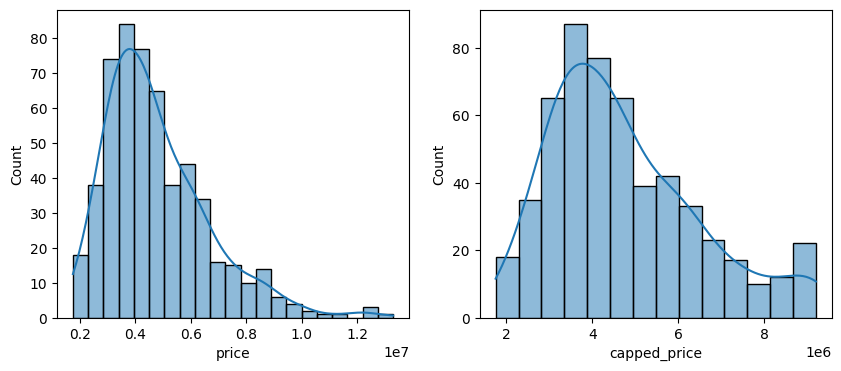

In [36]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(df['price'],kde=True,ax=ax1)
sns.histplot(df['capped_price'],kde=True,ax=ax2)
plt.show()